<a href="https://colab.research.google.com/github/grace-ylin/Modelling-Disease-Transmission/blob/main/SIRVQD_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

In [2]:
def diff_eqs(input, t, parameters):
  beta = parameters[0]
  gamma = parameters[1]
  chi = parameters[2]
  epsilon = parameters[3]
  theta = parameters[4]
  kappa = parameters[5]
  delta = parameters[6]
  mu = parameters[7]

  Y = np.zeros((6)) #SIRVQD
  V = input
  N = V[0]+V[1]+V[2]+V[3]+V[4]
  Y[0] = -beta*V[0]*V[1]/N-chi*V[0]
  Y[1] = beta*V[0]*V[1]/N + epsilon*V[1]*V[3]/N-(gamma+mu+theta)*V[1]
  Y[2] = gamma*V[1]+kappa*V[4]
  Y[3] = chi*V[0]-epsilon*V[1]*V[3]/N
  Y[4] = theta*V[1]-kappa*V[4]-delta*V[4]
  Y[5] = mu*V[1]+delta*V[4]
  return Y

In [3]:
starting_infections = 0.001 # 0.1% of the total popultion starts off infected
INPUT_0 = np.array([1-starting_infections, starting_infections, 0, 0, 0, 0])*10**6 # Initial values of SIRVQD scaled to a population of one million
R0 = 16
CFR = 0.0653 # Case fatality rate
gamma = 0.0714*(1-CFR)
mu = 0.0714*CFR
beta = R0*(gamma+mu)
chi = 0.7 / 365
epsilon = 0.075*beta
theta = 0.5*0.0714
kappa = gamma
delta = mu
parameters = np.array([beta, gamma, chi, epsilon, theta, kappa, delta, mu])
ND_end = 100 # Number of days to simulate

t_start = 0.0; t_end = ND_end; t_inc = 0.05
t_range_init = np.arange(t_start, t_end+t_inc, t_inc) # Time points to solve the system at
RES_init = spi.odeint(diff_eqs,INPUT_0,t_range_init,args=(parameters,))

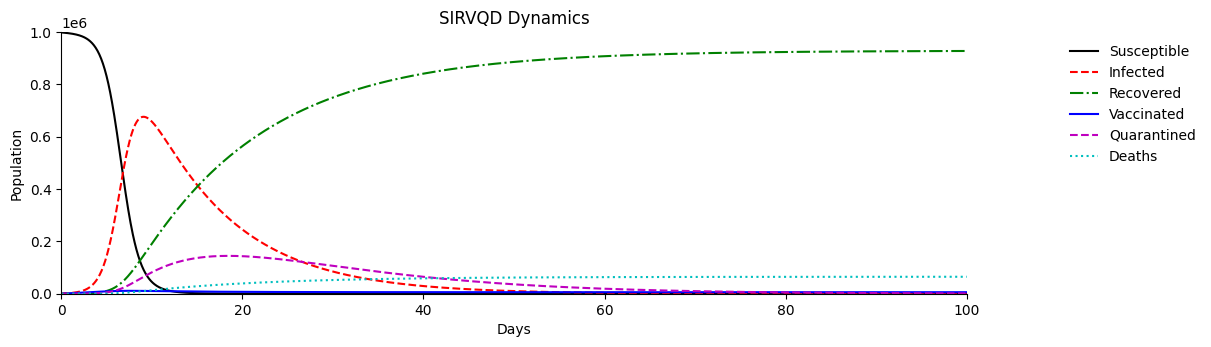

In [4]:
fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

t_vals = np.arange(0, ND_end + t_inc, t_inc)

ax.plot(t_vals, RES_init[:, 0], '-k', label='Susceptible') # S
ax.plot(t_vals, RES_init[:, 1], '--r', label='Infected') # I
ax.plot(t_vals, RES_init[:, 2], '-.g', label='Recovered') # R
ax.plot(t_vals, RES_init[:, 3], '-b', label='Vaccinated') # V
ax.plot(t_vals, RES_init[:, 4], '--m', label='Quarantined') # Q
ax.plot(t_vals, RES_init[:, 5], ':c', label='Deaths') # D

ax.set_xlabel('Days')
ax.set_ylabel('Population')

plt.xlim([0,ND_end])
plt.ylim([0,sum(INPUT_0)])
plt.tight_layout()
plt.title('SIRVQD Dynamics')
plt.legend(bbox_to_anchor = (1.1, 1), loc = 'upper left', frameon=False)
plt.show()